### Edgar Moises Hernandez-Gonzalez
#### 07/11/19-01/04/20
#### Clasificar CIFAR10 con CNN
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 72.83%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
391/391 - 3s - loss: 1.7187 - accuracy: 0.3671 - val_loss: 1.3926 - val_accuracy: 0.4938
Epoch 2/20
391/391 - 3s - loss: 1.3802 - accuracy: 0.5007 - val_loss: 1.2563 - val_accuracy: 0.5494
Epoch 3/20
391/391 - 3s - loss: 1.2451 - accuracy: 0.5531 - val_loss: 1.1376 - val_accuracy: 0.5897
Epoch 4/20
391/391 - 3s - loss: 1.1378 - accuracy: 0.5952 - val_loss: 1.0634 - val_accuracy: 0.6251
Epoch 5/20
391/391 - 3s - loss: 1.0586 - accuracy: 0.6267 - val_loss: 1.0679 - val_accuracy: 0.6207
Epoch 6/20
391/391 - 3s - loss: 0.9984 - accuracy: 0.6476 - val_loss: 0.9949 - val_accuracy: 0.6504
Epoch 7/20
391/391 - 3s - loss: 0.9442 - accuracy: 0.6684 - val_loss: 0.9385 - val_accuracy: 0.6671
Epoch 8/20
391/391 - 3s - loss: 0.9023 - accuracy: 0.6823 - val_loss: 0.9395 - val_accuracy: 0.6697
Epoch 9/20
391/391 - 3s - loss: 0.8688 - accuracy: 0.6941 - val_loss: 0.8974 - val_accuracy: 0.6859
Epoch 10/20
391/391 - 3s - loss: 0.8307 - accuracy: 0.7088 - val_loss: 0.8724 - val_accuracy: 0.6940

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.8282 - accuracy: 0.7283
Test loss: 0.8281733393669128
Test accuracy: 0.7282999753952026


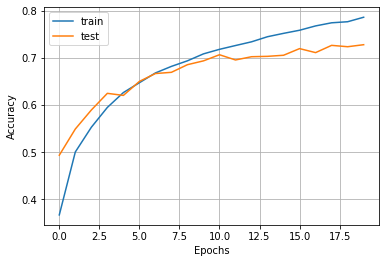

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

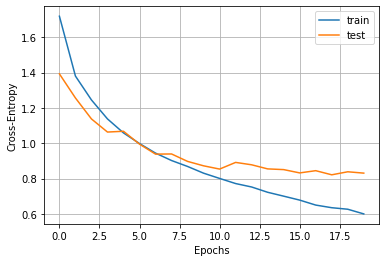

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[810  11  30  16  18   7   7  14  53  34]
 [ 20 805   4   8  14   2  15   4  51  77]
 [ 83   5 572  55 122  40  62  40  17   4]
 [ 31   6  69 561  87  83  86  42  23  12]
 [ 24   3  51  40 766  11  45  51   5   4]
 [ 19   1  62 214  74 525  38  62   4   1]
 [  8   0  37  42  40   8 849   4   8   4]
 [ 17   1  37  50  86  30   3 762   5   9]
 [ 81  23   7  16   8   4   4   6 836  15]
 [ 39  57  10  18  10   4  11  24  30 797]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.88      0.81      0.84      1000
           2       0.65      0.57      0.61      1000
           3       0.55      0.56      0.56      1000
           4       0.63      0.77      0.69      1000
           5       0.74      0.53      0.61      1000
           6       0.76      0.85      0.80      1000
           7       0.76      0.76      0.76      1000
           8       0.81      0.84      0.82      1000
           9       0.83      0.80      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [0]:
num_test = 5
print("Etiqueta verdadera", y_test[num_test])
prediccion = model.predict(x_test[num_test].reshape(1,32,32,3))
print("Etiqueta predicha", prediccion.argmax())

Etiqueta verdadera [6]
Etiqueta predicha 6


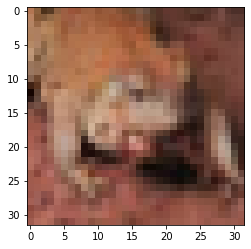

In [0]:
plt.imshow(x_test[num_test])
plt.show()